In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from preprocessing import Word_Embedder
from preprocessing import Text_processing
from text_classification import Text_classification, Text_classification_for_prediction, count_based_model
from text_classification import prepare_data_for_text_classification

In [3]:
os.chdir('E:\\Coding_projects\\Thai_NLP\\word_configs')

In [ ]:
x = count_based_model({'pos': ['pos.txt', 'pos_manual.txt'], 'neg': ['neg.txt', 'neg_manual.txt'], 'neu': []})

In [3]:
os.chdir('E:\\Coding_projects\\Thai_NLP\\Sentiment Analysis')

In [4]:
tr = []
with open('train.txt', 'r', encoding='utf8') as f:
    for line in f:
        line = line.strip()
        if line != '':
            tr.append(line)
            
tr_label = []
with open('train_label.txt', 'r', encoding='utf8') as f:
    for line in f:
        line = line.strip()
        if line != '':
            tr_label.append(line)
            
te = []
with open('test.txt', 'r', encoding='utf8') as f:
    for line in f:
        line = line.strip()
        if line != '':
            te.append(line)
            
te_label = []
with open('test_label.txt', 'r', encoding='utf8') as f:
    for line in f:
        line = line.strip()
        if line != '':
            te_label.append(line)

In [7]:
Tr = pd.DataFrame({'texts': tr, 'labels': tr_label})
Te = pd.DataFrame({'texts': te, 'labels': te_label})

In [8]:
Te.head()

,texts,labels
0,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,neg
1,ครับ #phithanbkk,neu
2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,neg
3,Cf clarins 5 ขวด 2850,neu
4,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,neu


In [3]:
df = pd.read_csv('mari-train-balanced.csv')
df2 = pd.read_csv('mari-test-balanced.csv')
df.head()

,texts,texts_deepcut,action,object,destination
0,สอบถาม package internet ว่ามีแบบไหนบ้างครับ,สอบถาม package internet ว่า มี แบบ ไหน บ้าง ครับ,enquire,promotion,promotions
1,พอดีพี่ซื้อเบอร์ซิม Inter ไปแล้ว แต่ยังไม่ได้ล...,พอดี พี่ ซื้อ เบอร์ซิม Inter ไป แล้ว แต่ ยัง ไ...,enquire,detail,billing and payment
2,ค่ะ พี่ค่ะ คืออยู่ๆ เน็ตเล่นไม่ได้อ่ะค่ะ,ค่ะ พี่ ค่ะ คือ อยู่ ๆ เน็ต เล่น ไม่ ได้ อ่ะ ค่ะ,enquire,internet,internet
3,การเปลี่ยน ระบบจาก ทรู เป็น ทรูเอช มีค่าบริการ...,การ เปลี่ยน ระบบ จาก ทรู เป็น ทรูเอช มี ค่า บร...,enquire,rate,promotions
4,เช็คให้หน่อยได้ไหมครับ ว่าเบอร์ของผม เปลี่ยนเป...,เช็ค ให้ หน่อย ได้ ไหม ครับ ว่า เบอร์ ของ ผม เ...,enquire,package,promotions


In [4]:
df = df.rename(columns={'destination': 'labels'})[['texts', 'labels']]
df2 = df2.rename(columns={'destination': 'labels'})[['texts', 'labels']]

In [5]:
df.head()

,texts,labels
0,สอบถาม package internet ว่ามีแบบไหนบ้างครับ,promotions
1,พอดีพี่ซื้อเบอร์ซิม Inter ไปแล้ว แต่ยังไม่ได้ล...,billing and payment
2,ค่ะ พี่ค่ะ คืออยู่ๆ เน็ตเล่นไม่ได้อ่ะค่ะ,internet
3,การเปลี่ยน ระบบจาก ทรู เป็น ทรูเอช มีค่าบริการ...,promotions
4,เช็คให้หน่อยได้ไหมครับ ว่าเบอร์ของผม เปลี่ยนเป...,promotions


In [5]:
os.chdir('..')

In [8]:
tmp_data = prepare_data_for_text_classification(train_dataframe=Tr,
                                                test_dataframe=Te,
                                                max_len=64,
                                                min_len=1,
                                                threshold_tfxidf=0.005
                                               )

neu    13105
neg     6140
pos     4300
q        518
Name: labels, dtype: int64


C:\Users\Admin\Anaconda3\envs\text_bay\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0 1 2 3], y=[0 0 1 ... 1 0 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


CW2: {0: 0.45904235024799694, 1: 0.9797638436482085, 2: 1.3990116279069766, 3: 11.613416988416988}


In [ ]:
tc =Text_classification(prepared_data_dict=tmp_data, 
                        do_deep_learning=True, 
                        do_linear_classifier=True, 
                        is_sequence_prediciton=False)

Linear classifier part
running 5-fold cv
Best C: 5, Best f1-scores: [0.88116243 0.90909091 0.77590361 0.88172043 0.80133185 0.85617597
 0.95238095]
Unweighted f1-score: 0.8653951658723057, Weighted f1-score: 0.8477599212454612


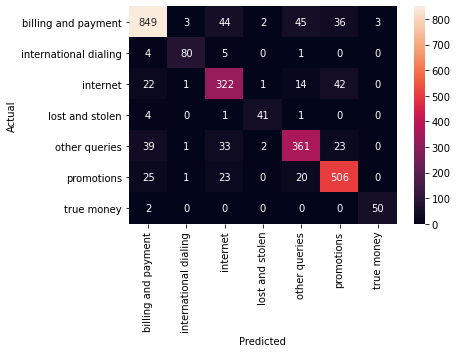

In [8]:
tc.fit_linear_classifier()

Epoch 1/500
161/161 [==============================] - 20s 124ms/step - loss: 0.8830 - precision: 0.7779 - recall: 0.6297 - val_loss: 1.0090 - val_precision: 0.8202 - val_recall: 0.7208 - lr: 0.0010
Epoch 2/500
161/161 [==============================] - 15s 96ms/step - loss: 0.8900 - precision: 0.7999 - recall: 0.6494 - val_loss: 1.1014 - val_precision: 0.7841 - val_recall: 0.7119 - lr: 0.0010
Epoch 3/500
161/161 [==============================] - 15s 96ms/step - loss: 0.9496 - precision: 0.7899 - recall: 0.6321 - val_loss: 1.1414 - val_precision: 0.8254 - val_recall: 0.6962 - lr: 0.0010
Epoch 4/500
161/161 [==============================] - 16s 99ms/step - loss: 0.8978 - precision: 0.8024 - recall: 0.6518 - val_loss: 1.0560 - val_precision: 0.8297 - val_recall: 0.6506 - lr: 0.0010
Epoch 5/500
161/161 [==============================] - 16s 99ms/step - loss: 0.7867 - precision: 0.8108 - recall: 0.6738 - val_loss: 0.9937 - val_precision: 0.8396 - val_recall: 0.6644 - lr: 0.0010
Epoch 6/5

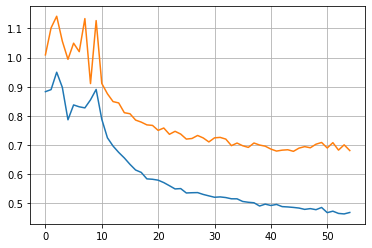

In [9]:
tc.fit_deep_learning()

In [8]:
# tc.fit_ensemble(5e-3,0.1)

linear_prediction: [0.0339347  0.00350534 0.01975266 0.00268576 0.03924427 0.89877451
 0.00210276]
dl_prediction: [5.7365797e-03 9.1864483e-04 1.1742757e-02 1.7704522e-04 1.6022399e-02
 9.6461564e-01 7.8693411e-04]
-----
linear_prediction: [0.59457259 0.01546059 0.22307242 0.00660594 0.11336827 0.03403696
 0.01288323]
dl_prediction: [0.6991231  0.00415532 0.05836102 0.00098591 0.2244429  0.01117605
 0.00175574]
-----
linear_prediction: [0.0558655  0.00281539 0.90660512 0.00202166 0.01439435 0.01731933
 0.00097867]
dl_prediction: [1.8012861e-02 6.9103797e-04 9.5653814e-01 3.2450768e-04 1.2877582e-02
 1.1425815e-02 1.3006906e-04]
-----
linear_prediction: [0.23185722 0.00862956 0.00656977 0.00102346 0.16114261 0.57616548
 0.01461189]
dl_prediction: [5.2739494e-02 4.3769574e-04 1.4137422e-02 4.6365586e-04 8.4993333e-01
 7.8846194e-02 3.4423808e-03]
-----
linear_prediction: [0.21933552 0.00306056 0.07012364 0.00992462 0.05556976 0.62816136
 0.01382454]
dl_prediction: [3.0957642e-01 7.269858

11/11 [==============================] - 1s 75ms/step - loss: 2.2747 - precision: 0.0704 - recall: 0.0037 - val_loss: 2.1464 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/500
11/11 [==============================] - 0s 21ms/step - loss: 1.8477 - precision: 0.5604 - recall: 0.0239 - val_loss: 2.0835 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/500
11/11 [==============================] - 0s 16ms/step - loss: 1.5258 - precision: 0.8487 - recall: 0.0741 - val_loss: 2.0269 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/500
11/11 [==============================] - 0s 26ms/step - loss: 1.2860 - precision: 0.8939 - recall: 0.1382 - val_loss: 1.9780 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 5/500
11/11 [==============================] - 0s 27ms/step - loss: 1.1147 - precision: 0.9111 - recall: 0.2049 - val_loss: 1.9382 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.00

Epoch 84/500
11/11 [==============================] - 0s 24ms/step - loss: 0.2768 - precision: 0.9469 - recall: 0.9188 - val_loss: 0.7979 - val_precision: 0.8535 - val_recall: 0.7488 - lr: 0.0010
Epoch 85/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2796 - precision: 0.9472 - recall: 0.9190 - val_loss: 0.7988 - val_precision: 0.8535 - val_recall: 0.7488 - lr: 0.0010
Epoch 86/500
11/11 [==============================] - 0s 23ms/step - loss: 0.2757 - precision: 0.9499 - recall: 0.9193 - val_loss: 0.7910 - val_precision: 0.8521 - val_recall: 0.7491 - lr: 0.0010
Epoch 87/500
11/11 [==============================] - 0s 25ms/step - loss: 0.2718 - precision: 0.9463 - recall: 0.9164 - val_loss: 0.7828 - val_precision: 0.8549 - val_recall: 0.7526 - lr: 0.0010
Epoch 88/500
11/11 [==============================] - 0s 21ms/step - loss: 0.2717 - precision: 0.9469 - recall: 0.9163 - val_loss: 0.7713 - val_precision: 0.8576 - val_recall: 0.7599 - lr: 0.0010
Epoch 89/500
11/11 [

Epoch 126/500
11/11 [==============================] - 0s 11ms/step - loss: 0.2284 - precision: 0.9467 - recall: 0.9224 - val_loss: 0.6473 - val_precision: 0.8643 - val_recall: 0.8063 - lr: 0.0010
Epoch 127/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2279 - precision: 0.9460 - recall: 0.9232 - val_loss: 0.6575 - val_precision: 0.8606 - val_recall: 0.7982 - lr: 0.0010
Epoch 128/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2284 - precision: 0.9475 - recall: 0.9225 - val_loss: 0.6511 - val_precision: 0.8622 - val_recall: 0.7994 - lr: 0.0010
Epoch 129/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2273 - precision: 0.9483 - recall: 0.9226 - val_loss: 0.6477 - val_precision: 0.8646 - val_recall: 0.8036 - lr: 0.0010
Epoch 130/500
11/11 [==============================] - 0s 24ms/step - loss: 0.2259 - precision: 0.9482 - recall: 0.9237 - val_loss: 0.6457 - val_precision: 0.8639 - val_recall: 0.8059 - lr: 0.0010
Epoch 131/500
1

Epoch 168/500
11/11 [==============================] - 0s 11ms/step - loss: 0.2003 - precision: 0.9482 - recall: 0.9290 - val_loss: 0.6130 - val_precision: 0.8569 - val_recall: 0.8105 - lr: 0.0010
Epoch 169/500
11/11 [==============================] - 0s 21ms/step - loss: 0.1984 - precision: 0.9462 - recall: 0.9264 - val_loss: 0.6080 - val_precision: 0.8571 - val_recall: 0.8147 - lr: 0.0010
Epoch 170/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2005 - precision: 0.9474 - recall: 0.9269 - val_loss: 0.6132 - val_precision: 0.8557 - val_recall: 0.8120 - lr: 0.0010
Epoch 171/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2003 - precision: 0.9478 - recall: 0.9285 - val_loss: 0.6155 - val_precision: 0.8562 - val_recall: 0.8109 - lr: 0.0010
Epoch 172/500
11/11 [==============================] - 0s 10ms/step - loss: 0.1985 - precision: 0.9480 - recall: 0.9292 - val_loss: 0.6105 - val_precision: 0.8591 - val_recall: 0.8140 - lr: 0.0010
Epoch 173/500
1

Epoch 210/500
11/11 [==============================] - 0s 23ms/step - loss: 0.1865 - precision: 0.9463 - recall: 0.9257 - val_loss: 0.5902 - val_precision: 0.8557 - val_recall: 0.8166 - lr: 0.0010
Epoch 211/500
11/11 [==============================] - 0s 11ms/step - loss: 0.1857 - precision: 0.9455 - recall: 0.9256 - val_loss: 0.5932 - val_precision: 0.8555 - val_recall: 0.8155 - lr: 0.0010
Epoch 212/500
11/11 [==============================] - 0s 10ms/step - loss: 0.1855 - precision: 0.9470 - recall: 0.9292 - val_loss: 0.5968 - val_precision: 0.8537 - val_recall: 0.8147 - lr: 0.0010
Epoch 213/500
11/11 [==============================] - 0s 10ms/step - loss: 0.1864 - precision: 0.9474 - recall: 0.9295 - val_loss: 0.6029 - val_precision: 0.8551 - val_recall: 0.8151 - lr: 0.0010
Epoch 214/500
11/11 [==============================] - 0s 11ms/step - loss: 0.1852 - precision: 0.9445 - recall: 0.9282 - val_loss: 0.6013 - val_precision: 0.8542 - val_recall: 0.8155 - lr: 0.0010
Epoch 215/500
1

# Prediction test

In [5]:
TC = Text_classification_for_prediction( path_to_tfxidf= 'models for real deployment\\tf-idf_encoder.joblib',
                                        model_path = 'models for real deployment\\text_classification')

loading logistic regression model


In [6]:
TC.predict('ทำไมอินเตอร์เนตผมช้ามากๆเลยครับ')

{'logistic_regression': {'billing and payment': 0.04239599199883396,
  'international dialing': 0.002549459155609322,
  'internet': 0.9208810924214039,
  'lost and stolen': 0.0012800403966359952,
  'other queries': 0.023315610086824624,
  'promotions': 0.007684539984556279,
  'true money': 0.0018932659561359188}}

In [7]:
TC.predict('โทรศัพท์ผมหาย ผมต้องทำยังไงบ้างครับ')

{'logistic_regression': {'billing and payment': 0.04957993119467105,
  'international dialing': 0.01410676326467718,
  'internet': 0.06836631971022208,
  'lost and stolen': 0.8019789371395918,
  'other queries': 0.03284068079988682,
  'promotions': 0.03211143365895513,
  'true money': 0.0010159342319958995}}

In [8]:
TC.predict('สอบถามบริการโทรต่างประเทศน่ะครับ')

{'logistic_regression': {'billing and payment': 0.009000535616081102,
  'international dialing': 0.9136489626289862,
  'internet': 0.004919699100065405,
  'lost and stolen': 0.0023058219177843234,
  'other queries': 0.053685728274877664,
  'promotions': 0.014218651980250626,
  'true money': 0.0022206004819546364}}